In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL


In [2]:
df_test = pd.read_csv('data/DailyDelhiClimateTest.csv', index_col='date', parse_dates=True)
df_train = pd.read_csv('data/DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)

df_train.head()


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df_train.describe()


,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [4]:
df_test.describe()


,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


# Check missing values

In [5]:
df_train.isnull().sum()


meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [6]:
df_test.isnull().sum()


meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

# Trend analysis


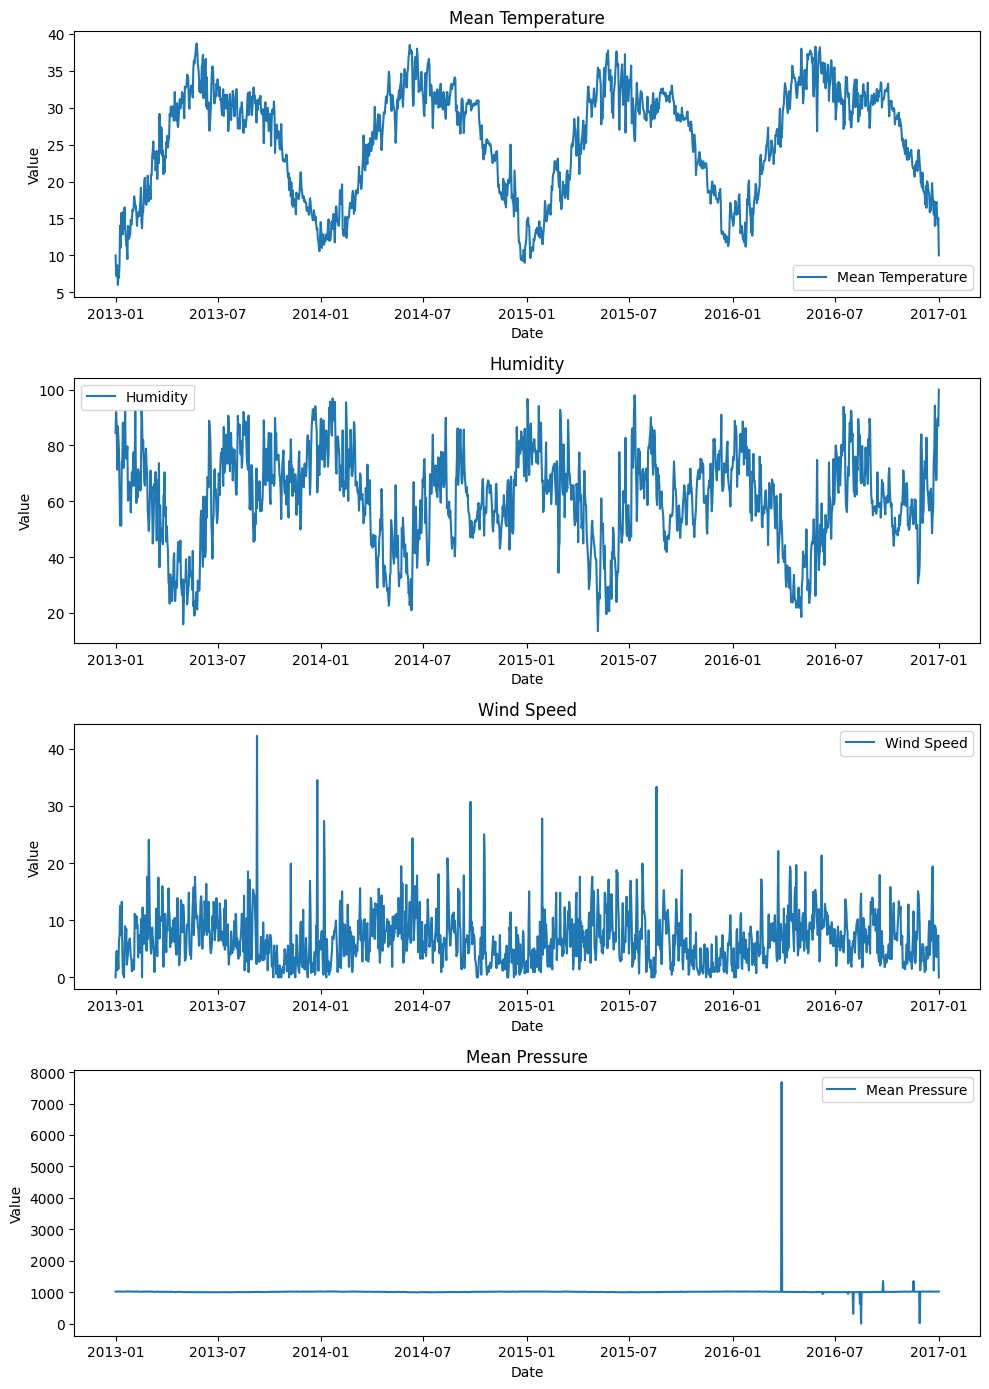

In [15]:
meantemp = df_train['meantemp']
humidity = df_train['humidity']
wind_speed = df_train['wind_speed']
meanpressure = df_train['meanpressure']

# Plotting each time series variable in separate subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 14))

# Plot for Mean Temperature
axes[0].plot(df_train.index, meantemp, label='Mean Temperature')
axes[0].set_title('Mean Temperature')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].legend()

# Plot for Humidity
axes[1].plot(df_train.index, humidity, label='Humidity')
axes[1].set_title('Humidity')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].legend()

# Plot for Wind Speed
axes[2].plot(df_train.index, wind_speed, label='Wind Speed')
axes[2].set_title('Wind Speed')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Value')
axes[2].legend()

# Plot for Mean Pressure
axes[3].plot(df_train.index, meanpressure, label='Mean Pressure')
axes[3].set_title('Mean Pressure')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Value')
axes[3].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Correlation between variables

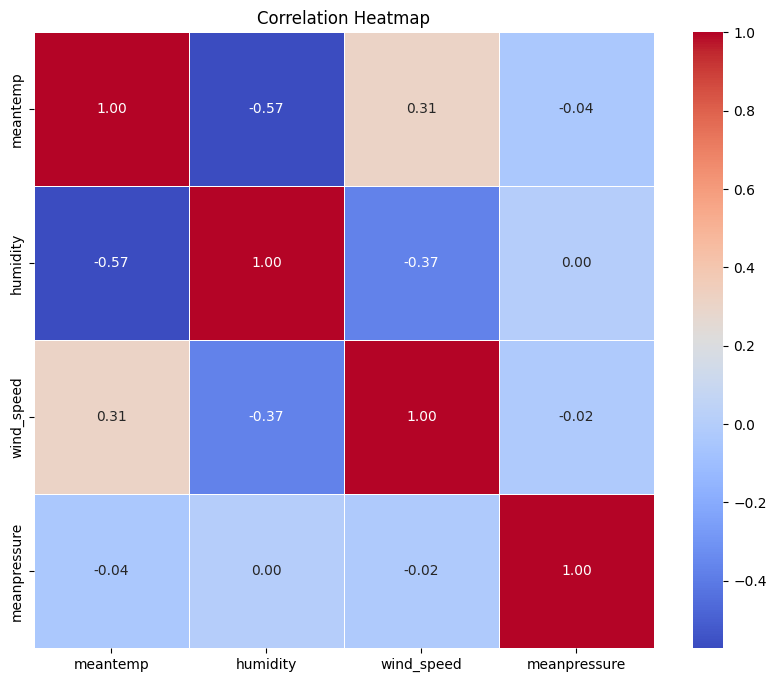

In [16]:
import seaborn as sns 

# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Scatter/ pair plots 

C:\Users\sfeye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


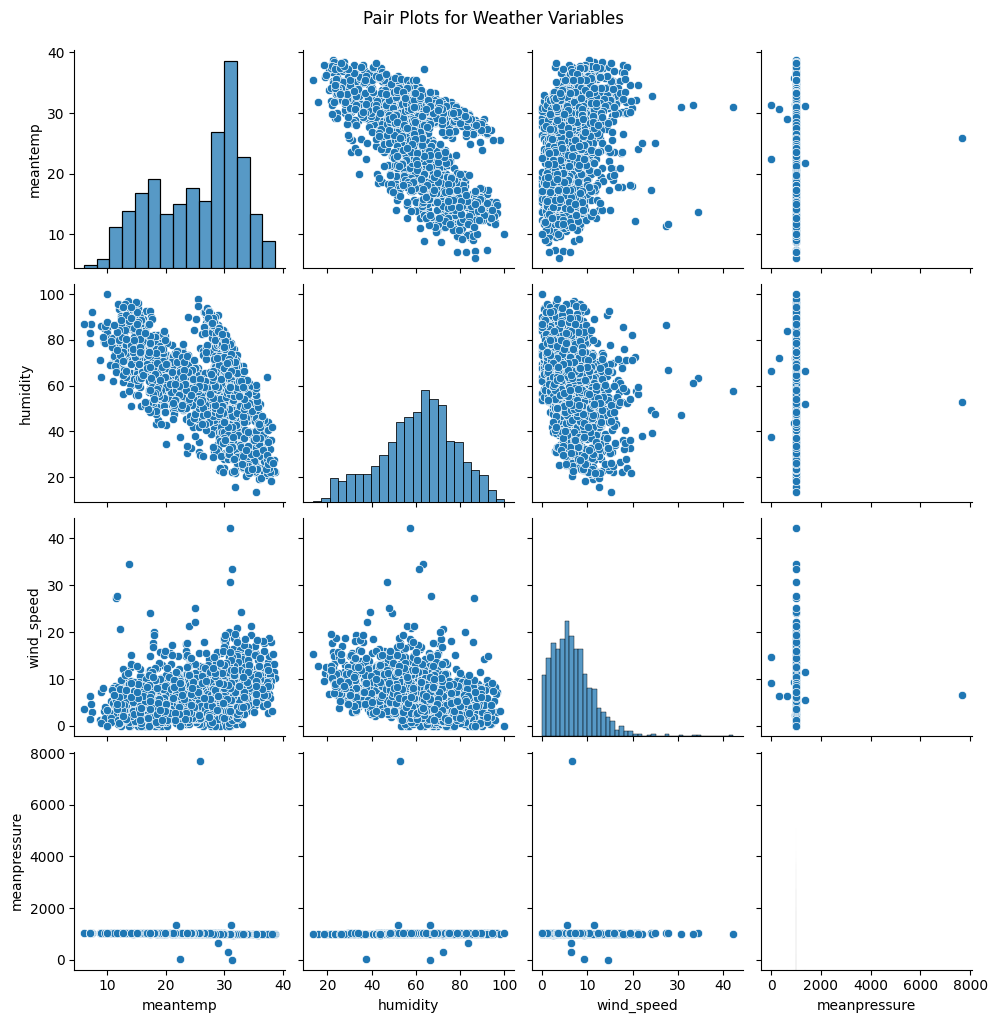

In [17]:
# Create pair plots (scatter plots) for selected variables
sns.pairplot(df_train)
plt.suptitle('Pair Plots for Weather Variables', y=1.02)
plt.show()
